# Histogram Equalization and Specification

## 1.Please prepare four images: (a) dark; (b) bright; (c)low contrast; (d) high contrast,like the following images.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

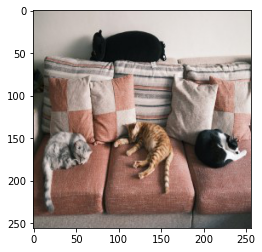

In [3]:
# read and show the target image
base_bgr = cv2.imread('four_cats.jpg')
base_rgb = base_bgr[:,:,::-1]
plt.imshow(base_rgb)
plt.show()

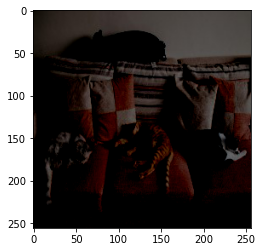

In [8]:
# generate four different images
dark = base_rgb.copy()
bright = base_rgb.copy()
low_con = base_rgb.copy()
high_con = base_rgb.copy()

alpha = 1.0 # simple contrast control
beta = 0  # simple brightness control

for y in range(base_rgb.shape[0]):
    for x in range(base_rgb.shape[1]):
        for c in range(base_rgb.shape[2]):
            # dark image process
            alpha = 1.0, beta = -150
            dark[y,x,c] = np.clip(alpha * base_rgb[y,x,c] + beta, 0, 255)

            # bright image process
            alpha = 1.0, beta = 150
            bright[y,x,c] = np.clip(alpha * base_rgb[y,x,c] + beta, 0, 255)

            # low contract image process
            alpha = 10.0, beta = 0
            low_con[y,x,c] = np.clip(alpha * base_rgb[y,x,c] + beta, 0, 255)

            # low contract image process
            alpha = -10.0, beta = 0
            high_con[y,x,c] = np.clip(alpha * base_rgb[y,x,c] + beta, 0, 255)

plt.imshow(dark)
plt.show()